# K-Means

Common indicators for evaluating clustering

* Rand index
* Mutual Information (MI)
* Homogenization Score
* completeness score
* v_meansure_score
* Silhouette
* calinski-harabaz Index

* Rand index: Suppose U is the external evaluation criterion, that is, true_label, and V is the clustering result. Set four statistics
> a is the logarithm of data points that are of the same class in U and also of the same class in V
> b is the logarithm of data points that belong to the same class in U but belong to different classes in V
> c is the log of data points that are not in the same class in U but are in the same class in V
> d is the logarithm of data points that are not in the same class in U and not in the same class in V

$ART = \frac{a+d}{a+b+c+d}$

* Silhouette coefficient: It is suitable for the case where the actual category information is unknown, and is used to calculate the average silhouette coefficient of all samples. For a single sample, let a be the average distance between the sample and other samples in the same class, and b be the average distance from the samples in the different classes that are closest to it.

$s(i) = \frac{b-a}{max(a,b)}$

* K :Elbow method

The optimal solution of the `K_means` parameter is to minimize the cost function. The cost function is the sum of the degree of distortion of each class. The degree of distortion of each class is equal to the sum of the squares of the distance between the center of gravity of the class and its internal members, but the average degree of distortion will vary with With the increase of `K`, it first decreases and then increases, so the minimum average distortion degree can be obtained.

## Start analyzing the wine dataset

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.spatial.distance import cdist
from sklearn import metrics

Data input

In [12]:
X = []
y_true = []
id = []

f = open('wine.data')
for line in f:
    y = []
    for index,item in enumerate(line.split(",")):
        if index == 0:
            id.append(int(item))
            continue
        y.append(float(item))
    X.append(y)
X = np.array(X)
y_true = np.array(id)


min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

C:\Users\Zixi Wang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


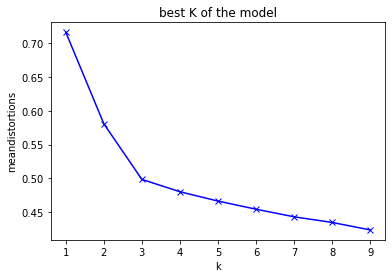

In [20]:
K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('meandistortions')
plt.title('best K of the model');
plt.show()

In [21]:
n_clusters = 3


cls = KMeans(n_clusters).fit(X)
y_pre = cls.predict(X)

n_samples,n_features=X.shape     
inertias = cls.inertia_  
adjusted_rand_s=metrics.adjusted_rand_score(y_true,y_pre)          
homogeneity_s=metrics.homogeneity_score(y_true,y_pre)               
silhouette_s=metrics.silhouette_score(X,y_pre,metric='euclidean')  
print("Rand Index",adjusted_rand_s)
print("Homogenization",homogeneity_s)
print("Silhouette",silhouette_s)

Rand Index 0.8685425493202144
Homogenization 0.8570247637781875
Silhouette 0.30134632735032324


Divide data of the same class into a subset of clusters, Display sample points within a subset of clusters

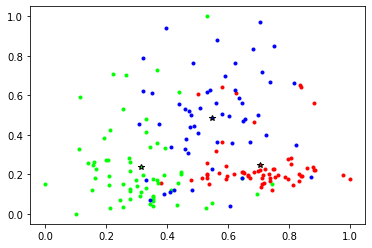

In [22]:
centers=cls.cluster_centers_  

colors=['#ff0000','#00ff00','#0000ff']  
plt.figure()    
for i in range(n_clusters):    
    index_sets=np.where(y_pre==i)  
    cluster=X[index_sets]   #
    plt.scatter(cluster[:,0],cluster[:,1],c=colors[i],marker='.')   
    plt.plot(centers[i][0],centers[i][1],'*',markerfacecolor=colors[i],markeredgecolor='k',markersize=6)
plt.show()
